In [1]:
import os

In [2]:
# checking we are workin in GPU environmrnt

from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [2]:
import PIL
from PIL import Image

In [3]:
train_human_dir = os.path.join('E:/horse-or-human/train/humans')
train_horse_dir = os.path.join('E:/horse-or-human/train/horses')

In [4]:
train_human_dir
train_horse_dir

'E:/horse-or-human/train/horses'

In [5]:
validation_human_dir = os.path.join('E:/horse-or-human/validation/humans')
validation_horse_dir = os.path.join('E:/horse-or-human/validation/horses')

In [6]:
validation_human_dir
validation_horse_dir

'E:/horse-or-human/validation/horses'

In [7]:
print('Total number of human pictures :', len(os.listdir(train_human_dir)))
print('Total number of horse pictures :', len(os.listdir(train_horse_dir)))

Total number of human pictures : 527
Total number of horse pictures : 500


In [8]:
print('Total number of human pictures :', len(os.listdir(validation_human_dir)))
print('Total number of horse pictures :', len(os.listdir(validation_horse_dir)))

Total number of human pictures : 128
Total number of horse pictures : 128


In [9]:
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])        
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])   

['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']


In [10]:
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])        
validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])                  

['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg

In [13]:
import random
# Declearing parameters for rows and col
ncols=4
nrows=4


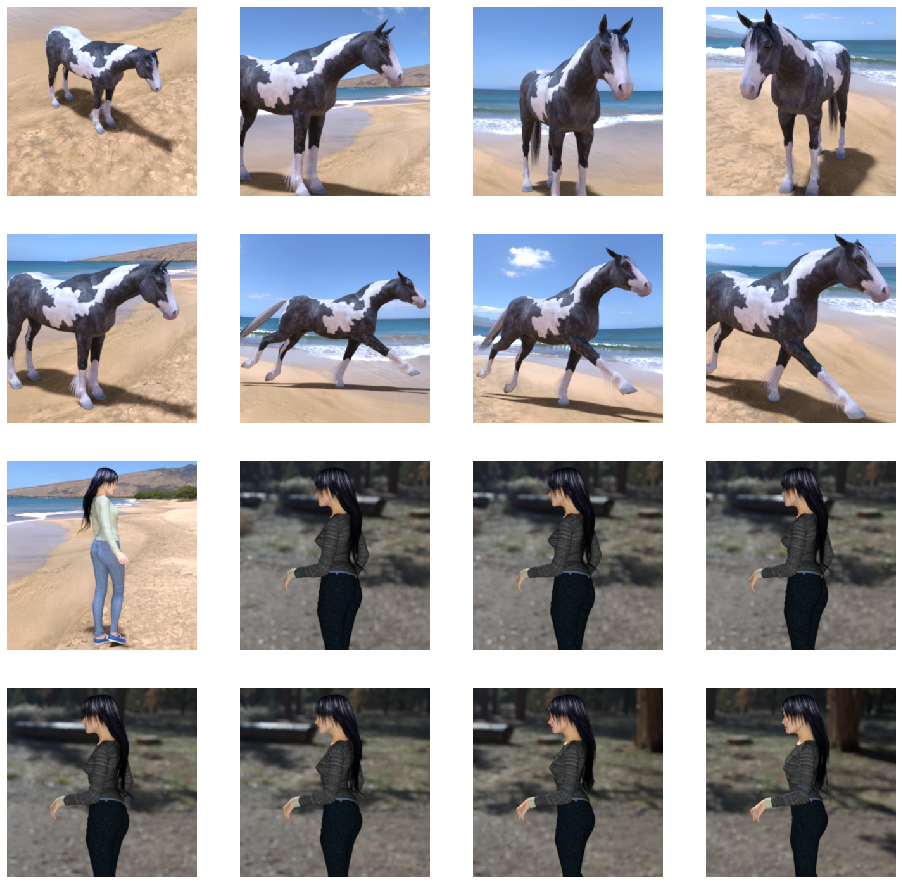

In [14]:
#Declearing Picture index
pic_index_human = random.randrange(0,518)
pic_index_horse = random.randrange(0,489)

# Set up a matploit fig and size it to fit 4*4 
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
next_horse = [os.path.join(train_horse_dir, fname)
             for fname in train_horse_names[pic_index_horse-8:pic_index_horse]]
next_human = [os.path.join(train_human_dir, fname)
             for fname in train_human_names[pic_index_human-8:pic_index_human]]

for i,img_path in enumerate(next_horse+next_human):
    #set up mataplot subplot indices starts at 1
    sp=plt.subplot(ncols,nrows,i+1)
    sp.axis('off')# Grid  shown
    img = npimg.imread(img_path)
    plt.imshow(img)
plt.show()    
        

In [15]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [17]:
#from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./225)
validation_datagen=ImageDataGenerator(rescale=1./225)

In [19]:
training_set = train_datagen.flow_from_directory('E:/horse-or-human/train',target_size=(300,300),batch_size=32,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [20]:
validation_set = validation_datagen.flow_from_directory('E:/horse-or-human/validation',target_size=(300,300),batch_size=8,class_mode='binary')

Found 256 images belonging to 2 classes.


In [21]:
model.fit_generator(training_set,steps_per_epoch=8,epochs=15,
                    validation_data = validation_set,validation_steps=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
33/33 [==============================] - 52s 2s/step - loss: 0.4733 - acc: 0.8072 - val_loss: 1.5349 - val_acc: 0.8320
Epoch 2/15
33/33 [==============================] - 43s 1s/step - loss: 0.0765 - acc: 0.9659 - val_loss: 2.4534 - val_acc: 0.7344
Epoch 3/15
33/33 [==============================] - 42s 1s/step - loss: 0.1160 - acc: 0.9669 - val_loss: 0.7522 - val_acc: 0.8828
Epoch 4/15
33/33 [==============================] - 41s 1s/step - loss: 0.0317 - acc: 0.9903 - val_loss: 1.5751 - val_acc: 0.8320
Epoch 5/15
33/33 [==============================] - 41s 1s/step - loss: 0.0111 - acc: 0.9961 - val_loss: 1.6525 - val_acc: 0.8633
Epoch 6/15
33/33 [==============================] - 41s 1s/step - loss: 0.0097 - acc: 0.9942 - val_loss: 1.4859 - val_acc: 0.8555
Epoch 7/15
33/33 [==============================] - 41s 1s/step - loss: 8.8371e-04 - acc: 1.0000 - val_loss: 1.5567 - val_acc: 0.8633
Epoch 8/15
33/33 [====================

In [138]:
import PIL
from PIL import Image
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
test_image=image.load_img('E:/horse-or-human/Download/horse_1.jpeg',target_size=(300,300))

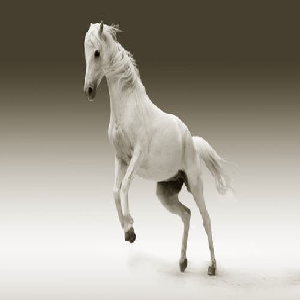

In [139]:
test_image

In [140]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0) 

In [141]:
x=preprocess_input(x)

#image = np.vstack([x])

In [142]:
classes = model.predict(x)

In [143]:
print(classes[0][0])

1.0


In [144]:
print(training_set.class_indices)

{'horses': 0, 'humans': 1}


In [145]:
if classes[0][0] == 1:
    print('Its a horse')
else:
    print('Its a human')

Its a horse
